# 最新用法

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from reranker import EmbeddingSimilarity
import numpy as np

import torch
evaluator = EmbeddingSimilarity()

def sheet(data,title):
    
    df = pd.DataFrame(data) # 创建DataFrame对象

    # 设置图表样式
    # plt.style.use('ggplot')

    # 绘制表格
    fig, ax = plt.subplots(figsize = (10,2))
    ax.axis('off')
    ax.set_title(title)  # 添加标题

    table = ax.table(cellText=df.values.round(2), colLabels=df.columns, rowLabels=df.index, loc='center')

    # 设置表格样式
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    table.auto_set_column_width(col=list(range(len(df.columns))))

    # 展示图表
    plt.show()

def showw(real_tby,eval_type):
    """
    画多图
    """
    # 模型名称和指标
    models = list(real_tby.keys())
    indicators = list(real_tby[next(iter(real_tby))].keys())

    # 初始化figure和axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # 对于每个指标，绘制不同模型的表现
    for indicator in indicators:
        values = [real_tby[model][indicator] for model in models]
        ax.plot(models, values, marker='o', label=indicator)

    # 添加一些细节
    ax.set_xlabel('Model', fontweight='bold')
    ax.set_ylabel('Score', fontweight='bold')
    ax.set_title(eval_type)
    ax.legend()

    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
    
def infer_zhibiao(num_infered_columns,data,norm:False):
    """
    要推理的列的数量（从后往前）   所有数据  lebels列
    norm 多个指标是否归一化
    """
    num_columns = len(data.columns)
    infered_columns = []
    for i in range(num_columns-1, -1, -1):
        if data.iloc[0,i] not in [0,1]:
            infered_columns.append(i)
            if len(infered_columns) == num_infered_columns:
                break
    infered_columns = list(data.iloc[:, infered_columns[-num_infered_columns:]])
    all_res = {}
    # 先算个总的  
    for col_name in infered_columns:
        col_data =  data[col_name].tolist()
        labels = data['actual_send_answer'].tolist()
        # 找出NaN值的索引
        nan_indexes = [index for index, value in enumerate(col_data) if pd.isnull(value)]
        if nan_indexes:
            print(f'---{col_name}有nan值：',nan_indexes)
            # 替换NaN值为空字符串
            for index in nan_indexes:
                col_data[index] = ''
        col_scores = evaluator.scores(col_data, labels)
        # 此处每个指标多个值算均值
        res = {k: float(np.mean(v)) for k, v in col_scores.items()}
        if norm:
            # 遍历字典，计算每个键的均值
            # for model_name,model_sorces in res.items():
            total = 0
            for idx_name,idx_sorce in res.items():
                if idx_name!='reranker':
                    total +=  idx_sorce
                else:
                    total += 2 * idx_sorce
            average = total / 10  # 每个键有四个指标，所以除以4
            all_res[col_name] = average
        else:
            all_res[col_name] = res
    return all_res

/root/miniconda3/envs/new_lf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

data_path = '/data/lj/llm/dataset/iter4/iter4-clean.csv'
data = pd.read_csv(data_path)
data.head(1)

,q,que,kb_ids,new_refer,actual_send_answer,qwl02-cleaned-base,qwl02-cleaned-base-gpt35,qwl02-cleaned-chat,qwl02-cleaned-chat-gpt35,qwl02-cleaneddoc3,...,qwl02,qwl02_gpt35,qwl02-cleaneddoc8-32b-base,qwl02-cleaneddoc8-32b-base_gpt35,qwl02-cleaneddoc8-32b-base-new,qwl02-cleaneddoc13-32b-base,qwl02-cleaneddoc18-32b-base,qwl02-cleaneddoc18-32b-base-cp12000,qwl02-cleaneddoc18-32b-base-cp15000,qwl02-cleaneddoc18-32b-base-cp18000
0,一包肠依做多少肉,"[{""role"":""assistant"",""content"":""很高兴为您服务,请问有什么可...","22, 23","['问题：""一包肠衣灌几斤肉啊"",答案：""亲,5斤一包肠衣可以灌5斤左右肉,10斤装的可以灌...","猪肠衣五斤一包4-5米左右,口径3.8-4.0左右,灌大约4斤肉 10斤一包8-10米左右,...",亲，猪肠衣五斤一包4-5米左右，口径3.8-4.0左右，灌大约4斤肉；10斤一包8-10米左...,1,亲，5斤一包肠衣可以灌5斤左右肉，10斤装的可以灌8-10斤肉，根据个人手法会有所不同哦。,1,"亲,5斤一包肠衣可以灌5斤左右肉,10斤装的可以灌8-10斤肉,根据个人手法会有所不同哦。",...,亲，5斤一包肠衣可以灌5斤左右肉，10斤装的可以灌8-10斤肉，根据个人手法会有所不同哦。,1,亲，5斤一包肠衣可以灌5斤左右肉，10斤装的可以灌8-10斤肉，根据个人手法会有所不同哦。,1,猪肠衣五斤一包4-5米左右，口径3.8-4.0左右，灌大约4斤肉 10斤一包8-10米左右，...,亲，5斤一包肠衣可以灌5斤左右肉，10斤装的可以灌8-10斤肉，根据个人手法会有所不同哦。,"亲，5斤一包肠衣可以灌5斤左右肉,10斤装的可以灌8-10斤肉,根据个人手法会有所不同哦。",亲，5斤一包肠衣可以灌5斤左右肉，10斤装的可以灌8-10斤肉，根据个人手法会有所不同哦。,"亲，5斤一包肠衣可以灌5斤左右肉,10斤装的可以灌8-10斤肉,根据个人手法会有所不同哦。","亲，5斤一包肠衣可以灌5斤左右肉,10斤装的可以灌8-10斤肉,根据个人手法会有所不同哦。"


In [3]:
# 所有的
res = infer_zhibiao(4,data,norm=False)
torch.cuda.empty_cache()
res


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.694 seconds.
Prefix dict has been built successfully.
Compute Scores: 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]


{'qwl02-cleaneddoc18-32b-base-cp18000': {'my_cmrc_eval': 61.52905712969793,
  'reranker': 74.18600723266601,
  'rouge-mean': 53.2195396,
  'bleu-3': 41.8232938},
 'qwl02-cleaneddoc18-32b-base-cp15000': {'my_cmrc_eval': 61.56883028743447,
  'reranker': 73.59935501098633,
  'rouge-mean': 52.8354568,
  'bleu-3': 41.1809796},
 'qwl02-cleaneddoc18-32b-base-cp12000': {'my_cmrc_eval': 62.1911160335377,
  'reranker': 72.93779693603516,
  'rouge-mean': 53.6936874,
  'bleu-3': 41.816244999999995},
 'qwl02-cleaneddoc18-32b-base': {'my_cmrc_eval': 61.664696000630926,
  'reranker': 74.27042617797852,
  'rouge-mean': 53.415672,
  'bleu-3': 42.036174}}

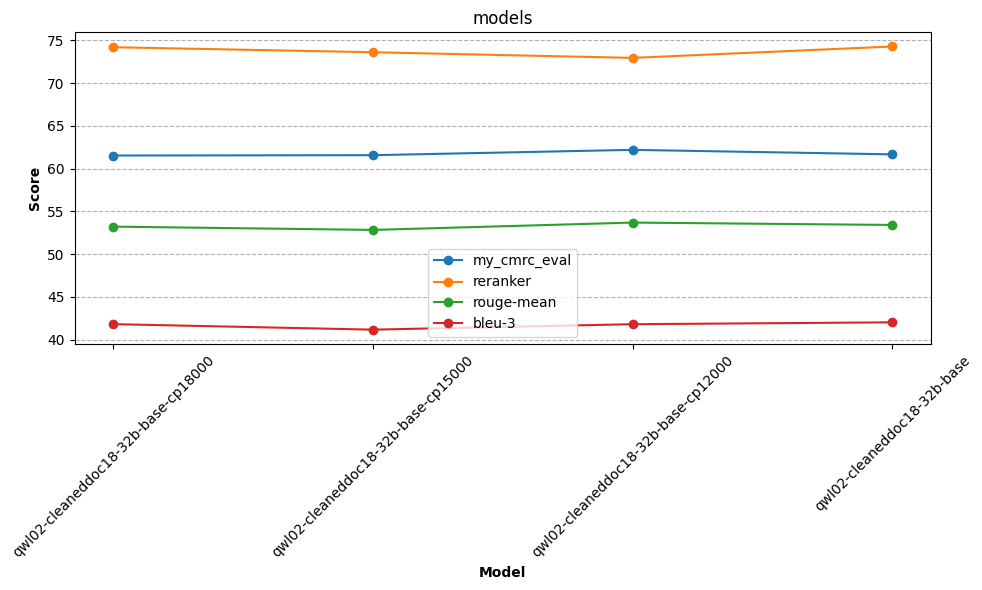

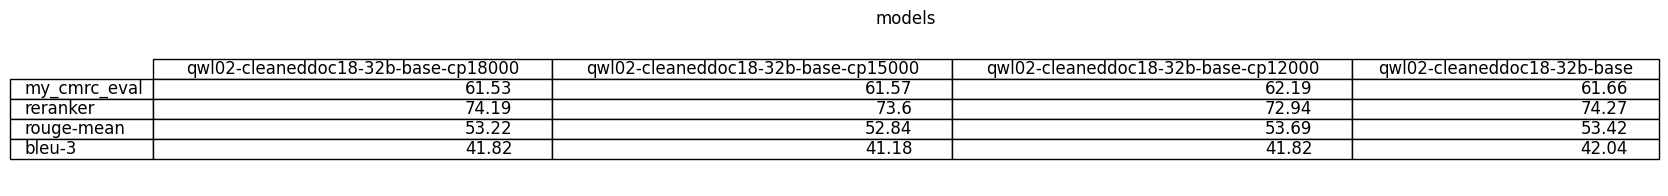

In [4]:
showw(res,'models')
sheet(res,'models')

Compute Scores: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


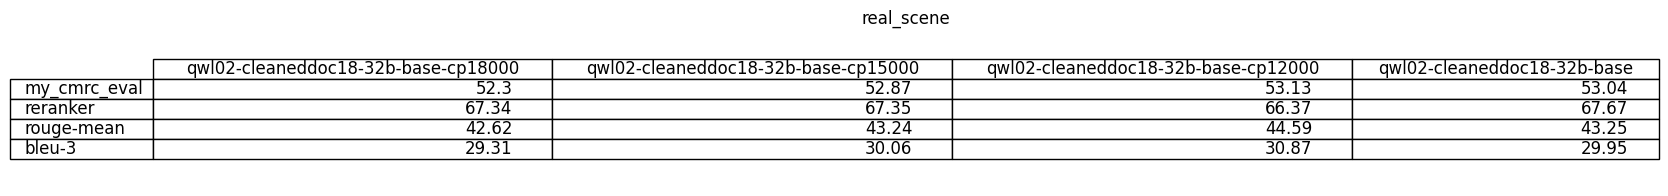

Compute Scores: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


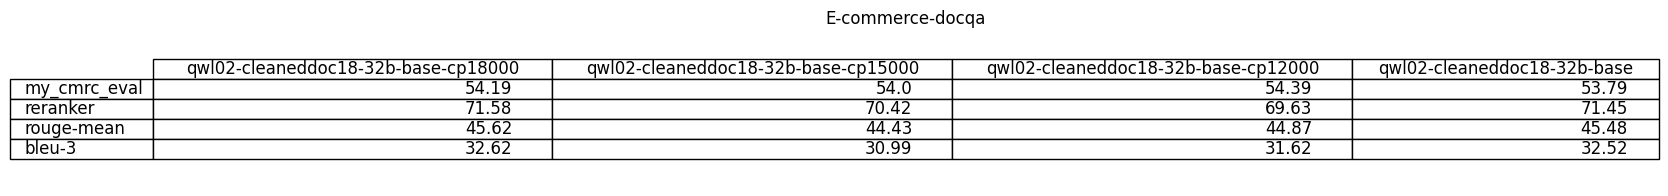

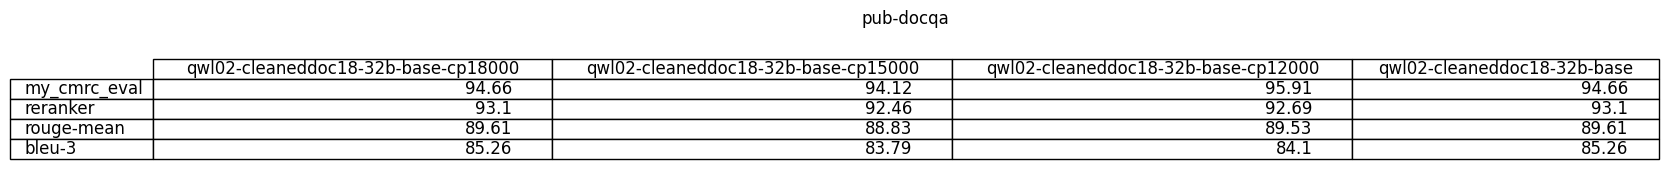

In [5]:
# 真实分布
res = infer_zhibiao(4,data[:200],norm=False)
torch.cuda.empty_cache()
# showw(res,'real_scene')
sheet(res,'real_scene')
# docqa-e-com
res = infer_zhibiao(4,data[200:400],norm=False)
torch.cuda.empty_cache()
# showw(res,'docqa-e-com')
sheet(res,'E-commerce-docqa')
# docqa-pub
res = infer_zhibiao(4,data[400:],norm=False)
torch.cuda.empty_cache()
# showw(res,'docqa-pub')
sheet(res,'pub-docqa')

In [ ]:
# 沁润的 最后100个
res_qr = infer_zhibiao(4,data[-100:],norm=False)
torch.cuda.empty_cache()
print(res_qr)
showw(res_qr)
sheet(res_qr)

In [ ]:
# 恬必优的 倒数100-倒数200个
res_tbu = infer_zhibiao(4,data[-200:-100],norm=False)
torch.cuda.empty_cache()
print(res_tbu)
showw(res_tbu)
sheet(res_tbu)

In [ ]:
# docqa  倒数200之前
res_docqa = infer_zhibiao(4,data[:-200],norm=False)
torch.cuda.empty_cache()
print(res_docqa)
showw(res_docqa)
sheet(res_docqa)